## Trial

In [2]:
import json
import pandas as pd
from sklearn.metrics import silhouette_score,calinski_harabasz_score,pairwise_distances
from Kernels.src.Analysis.Clustering import *
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors


In [3]:
data_input = pd.read_csv("Input_data/UMAP_METABRIC_4cmp_IC10_full.csv", sep = ",",index_col=0)
data_input=data_input.sample(n=100,axis=0,random_state=42)
df_new_clust=pd.DataFrame()
df_new_clust.index=data_input.index

In [6]:
#get classical kernel
#SELECT FT
n_qubits=4
features=[]
for i in range(1,int(n_qubits)+1):
    name_cna='Component_'+str(i)
    features.append(name_cna)
labels = 'IntClustMemb'
print(features)

########SAMPLING###################################
y_train=data_input[labels].to_numpy()
X_train=data_input[features]

['Component_1', 'Component_2', 'Component_3', 'Component_4']


In [4]:
#CHI from sklearn
chi_sk=calinski_harabasz_score(X_train,y_train)
#CHI home made
dist_matrix=pairwise_distances(X_train,X_train,metric='euclidean')
chi_hm=Calinski_Harabasz_Index(distance_matrix=dist_matrix,labels=y_train)
print(chi_sk,chi_hm)

2.503430144254359
58.87587513500715 nan


/CTGlab/home/valeria/miniconda3/envs/daism/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/CTGlab/home/valeria/miniconda3/envs/daism/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [7]:
dist_matrix.shape

(1000, 1000)

In [7]:
qk=pd.read_pickle("Kernels_Results/Supervised_1000/10_classes/Z_full/qk_tot_tr_0.125.pickle")
qk.shape

(220, 220)

## IGP

In [43]:
#Load qmatrix
qk=pd.read_pickle('Kernels_Results/Unsupervised_1000_umap/ZZ_full/qk_tot_2.pickle')
#Perform clustering
clustering=SpectralClustering(n_clusters=10,affinity='precomputed',random_state=42)
labels=clustering.fit_predict(qk)
#From affinaty to distance
q_k_dist=1-Scale(qk,(0,1))

In [44]:


# Assuming you have an affinity matrix `affinity_matrix`
# and labels of each sample in `labels`

# Find nearest neighbors
n_neighbors = 1  # You can adjust this as needed
neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='precomputed')
neighbors.fit(q_k_dist)
distances, indices = neighbors.kneighbors()

# Initialize a dictionary to store counts for each class
class_counts = {label: 0 for label in set(labels)}

# Count occurrences of nearest neighbors in the same class
for i, label in enumerate(labels):
    nearest_neighbor_index = indices[i, 0]  # Index of the nearest neighbor
    nearest_neighbor_label = labels[nearest_neighbor_index]
    
    if label == nearest_neighbor_label:
        class_counts[label] += 1

# Print or use the class counts as needed
for label, count in class_counts.items():
    print(f'Class {label}: {count} samples with nearest neighbor in the same class')


Class 0: 62 samples with nearest neighbor in the same class
Class 1: 68 samples with nearest neighbor in the same class
Class 2: 56 samples with nearest neighbor in the same class
Class 3: 104 samples with nearest neighbor in the same class
Class 4: 91 samples with nearest neighbor in the same class
Class 5: 59 samples with nearest neighbor in the same class
Class 6: 87 samples with nearest neighbor in the same class
Class 7: 90 samples with nearest neighbor in the same class
Class 8: 76 samples with nearest neighbor in the same class
Class 9: 67 samples with nearest neighbor in the same class


In [45]:
#Evaluate igp
IGPs={}
for class_ in set(labels):
    class_size=labels.tolist().count(class_)
    
    IGPs[class_]=class_counts[class_]/class_size
    print('Class {} has IGP : {} '.format(class_,IGPs[class_]))


Class 0 has IGP : 0.8266666666666667 
Class 1 has IGP : 0.723404255319149 
Class 2 has IGP : 0.7887323943661971 
Class 3 has IGP : 0.7878787878787878 
Class 4 has IGP : 0.7913043478260869 
Class 5 has IGP : 0.7023809523809523 
Class 6 has IGP : 0.8365384615384616 
Class 7 has IGP : 0.7692307692307693 
Class 8 has IGP : 0.76 
Class 9 has IGP : 0.6203703703703703 


In [46]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming you have an affinity matrix `affinity_matrix`
# and labels of each sample in `labels`

# Find nearest neighbors
n_neighbors = 1  # You can adjust this as needed
neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='precomputed')
neighbors.fit(q_k_dist)
distances, indices = neighbors.kneighbors()

# Count occurrences of nearest neighbors in the same class
class_counts = {label: 0 for label in np.unique(labels)}
total_samples_per_class = {label: 0 for label in np.unique(labels)}

for i, label in enumerate(labels):
    nearest_neighbor_index = indices[i, 0]  # Index of the nearest neighbor
    nearest_neighbor_label = labels[nearest_neighbor_index]
    
    if label == nearest_neighbor_label:
        class_counts[label] += 1
    
    total_samples_per_class[label] += 1

# Normalize the counts by the total number of samples in each class
normalized_counts = {label: count / total_samples_per_class[label] for label, count in class_counts.items()}

# Print or use the normalized counts as needed
for label, count in normalized_counts.items():
    print(f'Class {label}: {count:.2f} IGP')


Class 0: 0.83 IGP
Class 1: 0.72 IGP
Class 2: 0.79 IGP
Class 3: 0.79 IGP
Class 4: 0.79 IGP
Class 5: 0.70 IGP
Class 6: 0.84 IGP
Class 7: 0.77 IGP
Class 8: 0.76 IGP
Class 9: 0.62 IGP


## Silhouette analysis

For n_clusters = 10 The average silhouette_score is : 0.3418866542418854


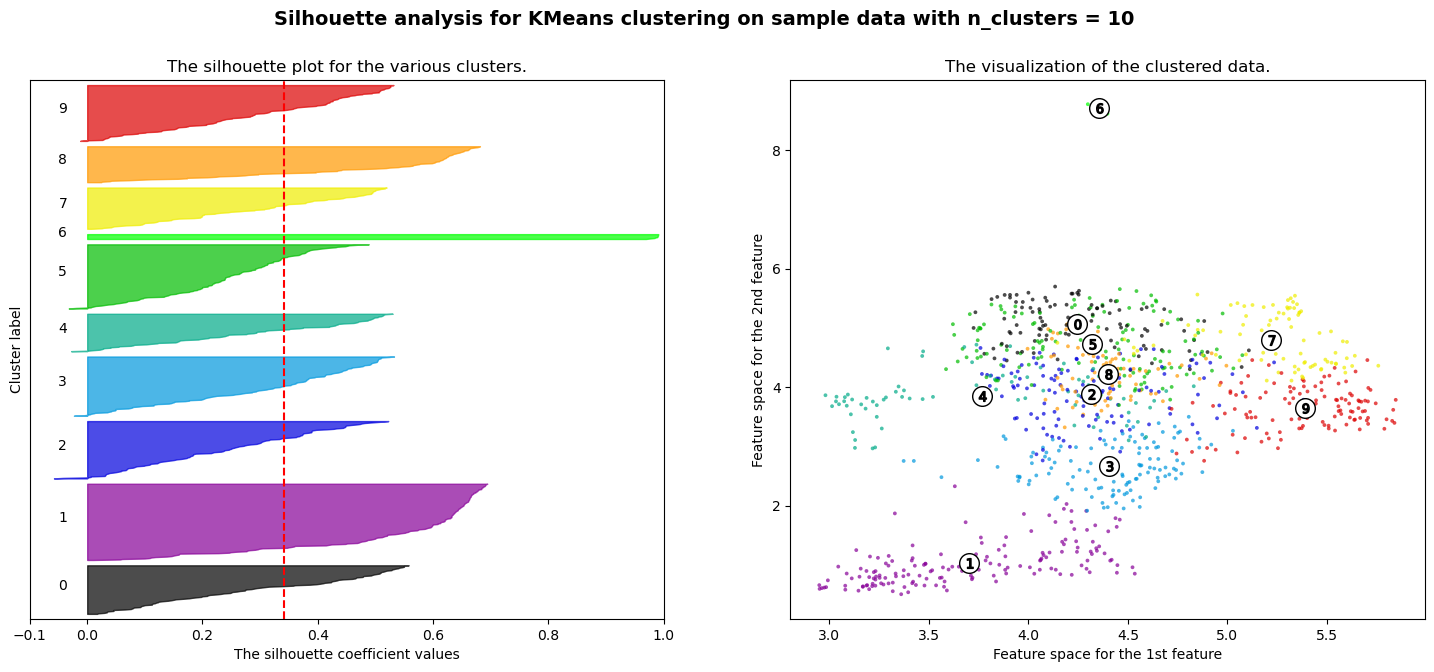

In [12]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train.to_numpy()
range_n_clusters = [10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [21]:
def Silhouette_analysis(X,cluster_labels,n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
   
    silhouette_avg = silhouette_score(X, cluster_labels)
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.\n (Silhouette score {}) ".format(np.round(silhouette_avg,3)))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis  for clustering on sample data with n_clusters = {}".format(n_clusters,),
        fontsize=14,
        fontweight="bold",
    )
plt.savefig('Silhouette_analysis_{}.png'.format(n_clusters))

    


    
    

    


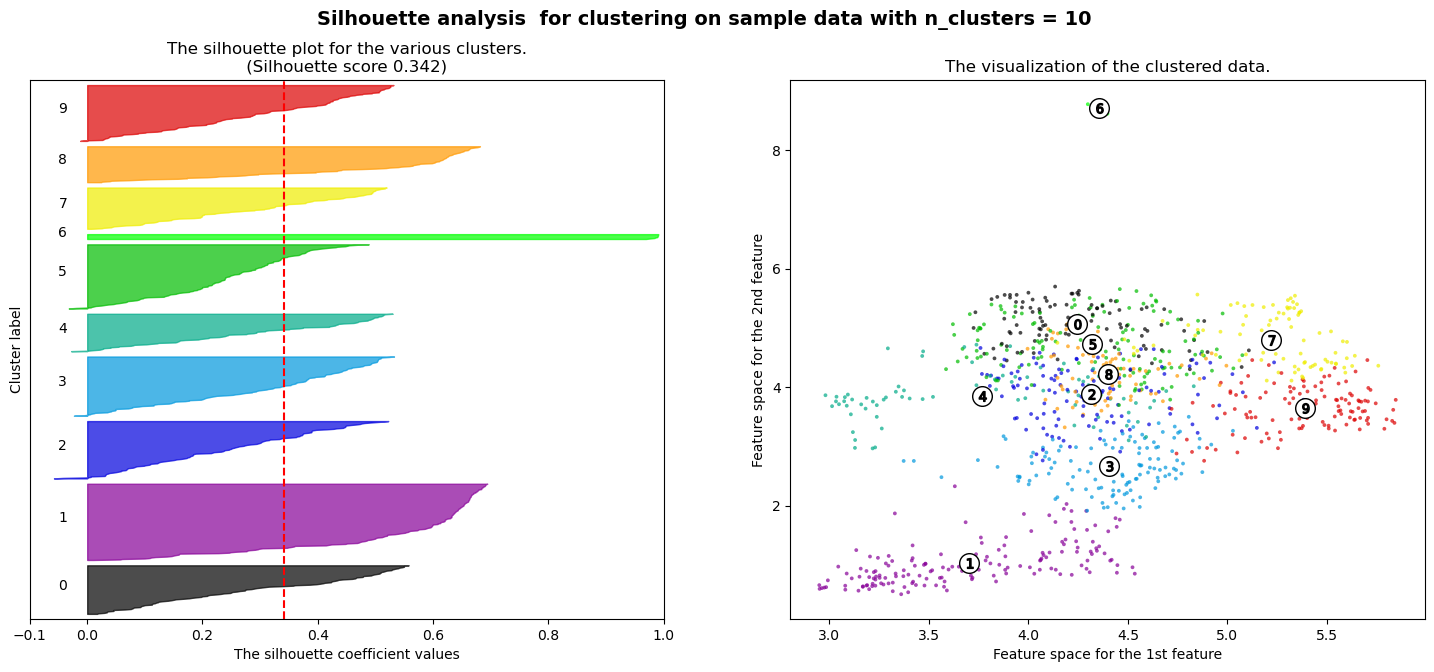

In [22]:
Silhouette_analysis(X,cluster_labels=cluster_labels,n_clusters=10)

# Hardware comparison

In [4]:
df_real=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Prova/clustering_100_opt_k_reviewed.csv')
df_sim=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_100_umap/clustering_100_opt_k_reviewed.csv')

In [5]:
#Replace
df_sim.replace('Z_full','Z_sim',inplace=True)
df_real.replace('Z_full','Z_real',inplace=True)


In [6]:
df= pd.concat([df_sim, df_real], axis=0)

In [8]:
df.head()

,Unnamed: 0,ftmap,K,Bandwidth,s,geom_distance,concentration,silhouette,Score_cluster,CHI,DI,v_intra,v_inter,N_samples
0,0,rbf,2,0.125,17881.043575,1.751525,0.040536,0.769213,0.761888,44.248236,0.948850,0.019627,0.007880,100
1,1,rbf,3,0.125,17881.043575,1.751525,0.040536,0.578659,0.669947,75.249441,0.026336,0.006730,0.050097,100
2,2,rbf,4,0.125,17881.043575,1.751525,0.040536,0.381487,0.639101,66.995311,0.022874,0.005174,0.046837,100
3,3,rbf,5,0.125,17881.043575,1.751525,0.040536,0.339353,0.644123,56.611376,0.015088,0.004944,0.044443,100
4,4,rbf,6,0.125,17881.043575,1.751525,0.040536,0.392213,0.700089,59.503937,0.016159,0.003948,0.042539,100


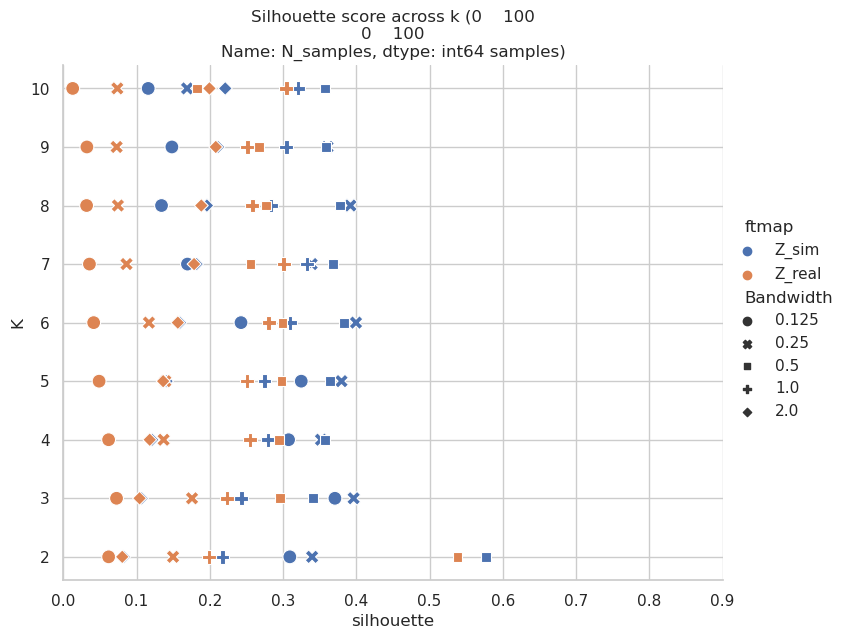

In [14]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df[df['ftmap'].isin(['Z_sim','Z_real'])],
    style="Bandwidth", x="silhouette",
    hue="ftmap",
    y="K",s=100,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlim(-0.0,0.9)
#g.despine(left=True, bottom=True)


g.set(title='Silhouette score across k ({} samples)'.format(df.N_samples[0]))
#plt.title()
#plt.xlabel('Number of Clusters')
# Show the plot



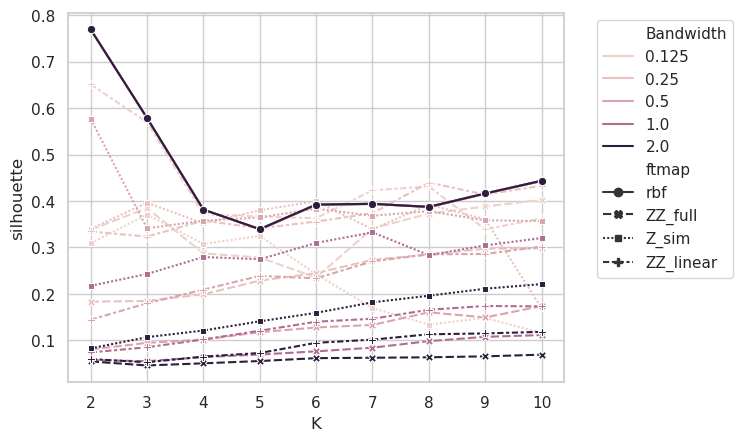

In [20]:


sns.lineplot(data=df[df['ftmap']!='Z_real'],
             x='K',y='silhouette',style='ftmap',hue='Bandwidth',markers=True)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
